# CH16 下载数据

### 分析CSV文件头

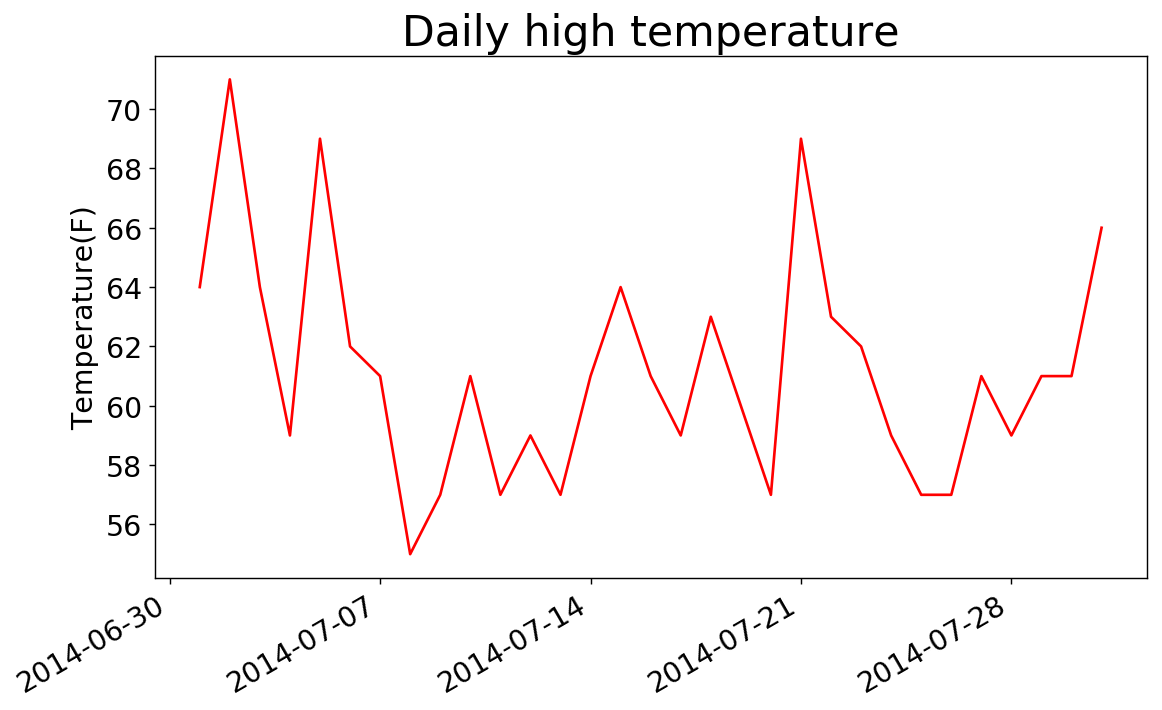

In [16]:
import csv
from datetime import datetime
from matplotlib import pyplot as plt

filename = 'sitka_weather_07-2014.csv'
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    
    dates, highs = [], []
    for row in reader:
        date = datetime.strptime(row[0], "%Y-%m-%d")
        dates.append(date)
        
        high = int(row[1])
        highs.append(high)
        
    fig = plt.figure(dpi=128, figsize=(10, 6))
    plt.plot(dates, highs, c='red')
    
    plt.title("Daily high temperature", fontsize=24)
    plt.xlabel('', fontsize=16)
    fig.autofmt_xdate()
    plt.ylabel("Temperature(F)", fontsize=16)
    plt.tick_params(axis='both', which='major', labelsize=16)
    
    plt.show()

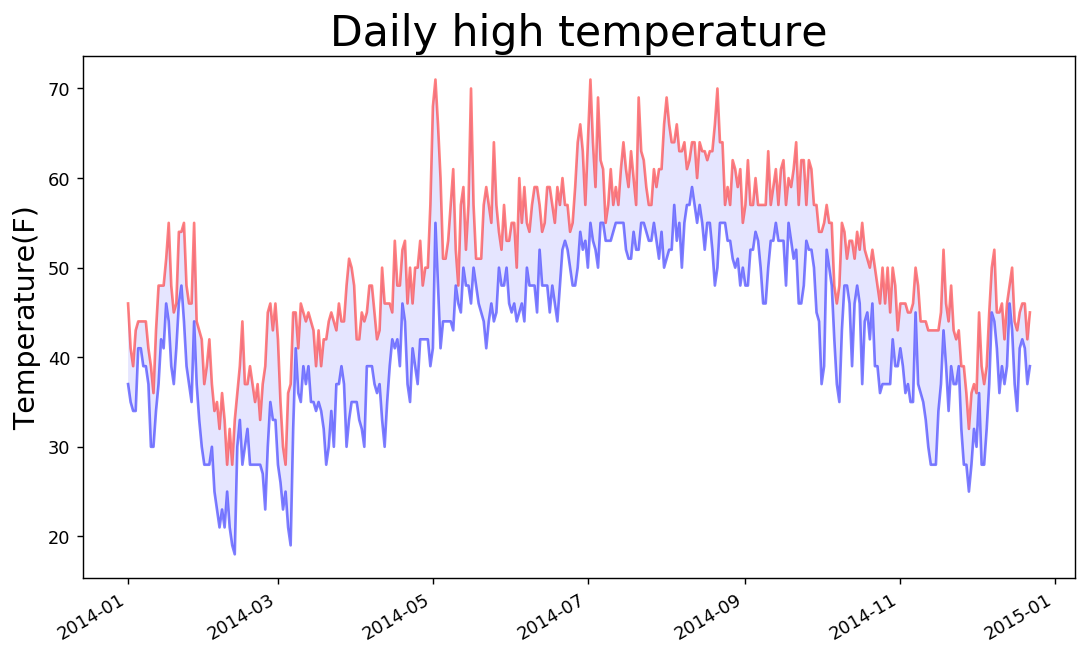

In [22]:
import csv
from datetime import datetime
from matplotlib import pyplot as plt

filename = 'sitka_weather_2014.csv'
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    
    dates, highs, lows = [], [], []
    for row in reader:
        date = datetime.strptime(row[0], "%Y-%m-%d")
        dates.append(date)
        
        high = int(row[1])
        highs.append(high)
        
        low = int(row[3])
        lows.append(low)
        
    fig = plt.figure(dpi=128, figsize=(10, 6))
    plt.plot(dates, highs, c='red', alpha=0.5)
    plt.plot(dates, lows, c='blue', alpha=0.5)
    plt.fill_between(dates, highs, lows, facecolor='blue', alpha=0.1)
    
    plt.title("Daily high temperature", fontsize=24)
    plt.xlabel('', fontsize=16)
    fig.autofmt_xdate()
    plt.ylabel("Temperature(F)", fontsize=16)
    plt.tick_params(axis='both', which='major', labelsize=10)
    
    plt.show()

2014-02-16 00:00:00 missing data


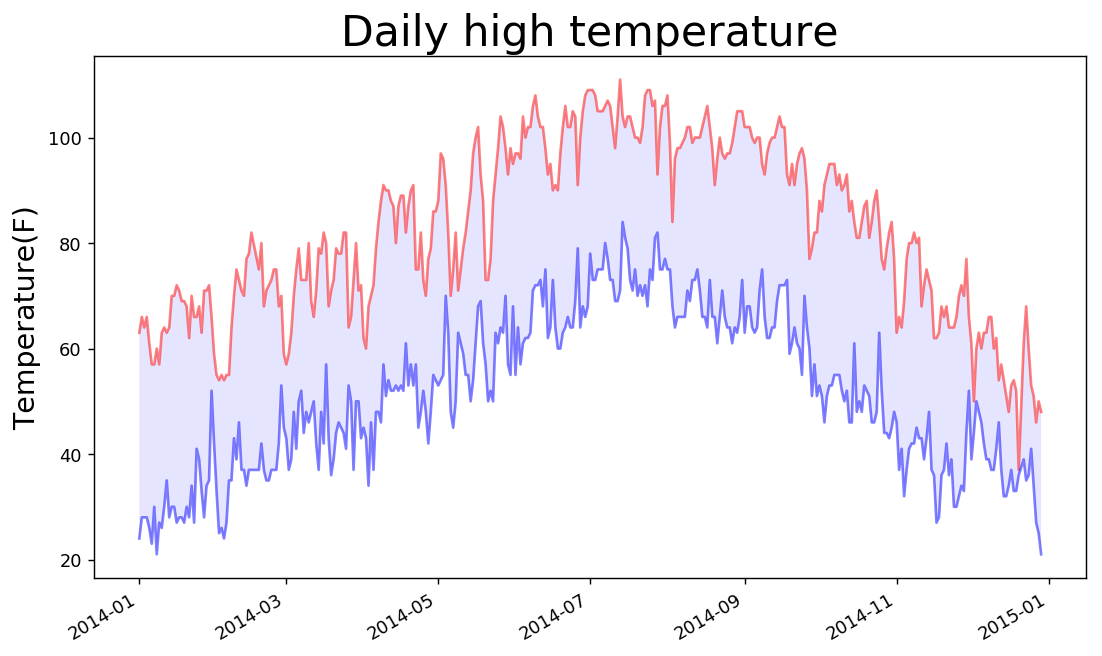

In [24]:
import csv
from datetime import datetime
from matplotlib import pyplot as plt

filename = 'death_valley_2014.csv'
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    
    dates, highs, lows = [], [], []
    for row in reader:
        try:
            date = datetime.strptime(row[0], "%Y-%m-%d")
            high = int(row[1])
            low = int(row[3])
        except ValueError:
            print(date, 'missing data')
        else:
            dates.append(date)        
            highs.append(high)
            lows.append(low)
        
    fig = plt.figure(dpi=128, figsize=(10, 6))
    plt.plot(dates, highs, c='red', alpha=0.5)
    plt.plot(dates, lows, c='blue', alpha=0.5)
    plt.fill_between(dates, highs, lows, facecolor='blue', alpha=0.1)
    
    plt.title("Daily high temperature", fontsize=24)
    plt.xlabel('', fontsize=16)
    fig.autofmt_xdate()
    plt.ylabel("Temperature(F)", fontsize=16)
    plt.tick_params(axis='both', which='major', labelsize=10)
    
    plt.show()

In [31]:
from __future__ import (absolute_import, division, print_function, unicode_literals)

try:
    # python 2.x
    from urllib2 import urlopen
except ImportError:
    # python 3.x
    from urllib.request import urlopen
import json

json_url = 'https://raw.githubusercontent.com/muxuezi/btc/master/btc_close_2017.json'
response = urlopen(json_url)
# 读取数据
req = response.read()
# 将数据写入文件
with open('btc_close_2017_urllib.json', 'wb') as f:
    f.write(req)
# 加载json格式
file_urllib = json.loads(req)

In [33]:
import requests

json_url = 'https://raw.githubusercontent.com/muxuezi/btc/master/btc_close_2017.json'
req = requests.get(json_url)
# 将数据写入文件
with open('btc_close_2017_request.json', 'w') as f:
    f.write(req.text)
# 加载json格式
file_requests = req.json()

In [40]:
import json
import pygal
import math

# 将数据加载到一个列表中
filename = 'btc_close_2017.json'
with open(filename) as f:
    btc_data = json.load(f)

dates, months, weeks, weekdays, close = [], [], [], [], []
# 打印每一天的信息
for btc_dict in btc_data:
    dates.append(btc_dict['date'])
    months.append(int(btc_dict['month']))
    weeks.append(int(btc_dict['week']))
    weekdays.append(btc_dict['weekday'])
    close.append(int(float(btc_dict['close'])))
    
line_chart = pygal.Line(x_label_rotation=20, show_minor_x_labels=False)
line_chart.title = "收盘价（￥）"
line_chart.x_labels = dates
# 每隔20天显示一次横坐标
line_chart.x_labels_major = dates[::20]
line_chart.add('收盘价', close)
line_chart.render_to_file('收盘价折线图.svg')

line_chart_log = pygal.Line(x_label_rotation=20, show_minor_x_labels=False)
line_chart_log.title = '对数收盘价（￥）'
line_chart_log.x_labels = dates
line_chart_log.x_labels_major = dates[::20]
close_log = [math.log10(x) for x in close]
line_chart_log.add('收盘价对数', close_log)
line_chart_log.render_to_file('对数收盘价折线图.svg')

In [49]:
import json
import pygal
from itertools import groupby

filename = 'btc_close_2017.json'

with open(filename) as f:
    btc_data = json.load(f)
    
dates, months, weeks, weekdays, close = [], [], [], [], []
for btc_dict in btc_data:
    dates.append(btc_dict['date'])
    months.append(int(btc_dict['month']))
    weeks.append(int(btc_dict['week']))
    weekdays.append(btc_dict['weekday'])
    close.append(int(float(btc_dict['close'])))
    
def draw_line(x_data, y_data, title, y_legend):
    xy_map = []
    for x, y in groupby(sorted(zip(x_data, y_data)), key=lambda _:_[0]):
        y_list = [v for _, v in y]
        xy_map.append([x, sum(y_list)/len(y_list)])
        
    x_unique, y_mean = [*zip(*xy_map)]
    line_chart = pygal.Line()
    line_chart.title = title
    line_chart.x_labels = x_unique
    line_chart.add(y_legend, y_mean)
    line_chart.render_to_file(title + '.svg')
    return line_chart

idx_month = dates.index('2017-12-01')
line_chart_month = draw_line(months[:idx_month], close[:idx_month], '收盘价月日均值', '月日均值')

idx_week = dates.index('2017-12-11')
line_chart_week = draw_line(weeks[1:idx_week], close[1:idx_week], '收盘价周日均值', '周日均值')

idx_weekday = dates.index('2017-12-11')
wd = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_int = [wd.index(w)+1 for w in weekdays[1:idx_weekday]]
line_chart_weekday = draw_line(weekday_int, close[1:idx_weekday], '收盘价星期均值', '星期均值')
line_chart_weekday.x_labels = ['周一', '周二', '周三', '周四', '周五', '周六', '周日']
line_chart_weekday.render_to_file('收盘价星期均值.svg')

In [52]:
with open('收盘价Dashboard.html', 'w', encoding='utf8') as html_file:
    html_file.write('<html><head><title>收盘价Dashboard</title><metacharset="utf-8"></head><body>\n')
    for svg in[
        '收盘价折线图.svg', '对数收盘价折线图.svg', '收盘价周日均值.svg', 
        '收盘价月日均值.svg', '收盘价星期均值.svg'
    ]:
        html_file.write('<object type="image/svg+xml" data="{0}" height=500></object>\n'.format(svg))
        html_file.write('</body></html>')